In [2]:
#import libraries
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_path = Path("../Data/cs-training.csv")
train_df = pd.read_csv(train_path)

In [6]:
train_df.shape

(150000, 12)

# Data Cleaning

In [7]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
# check for nulls
train_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [12]:
train_df = train_df.dropna().copy()

In [13]:
train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [14]:
# check data type for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtype

# Plot Distribution and Correlation

In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [16]:
correlation = train_df.corr()
correlation

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002386,-0.102685,0.123159,-0.003291,-0.019746,-0.027445,0.111149,-0.003005,0.093836,0.046704
RevolvingUtilizationOfUnsecuredLines,-0.002386,1.000000,-0.005476,-0.001194,-0.000243,0.007124,-0.010880,-0.000931,0.005895,-0.000955,0.002347
age,-0.102685,-0.005476,1.000000,-0.049177,-0.001260,0.037717,0.187112,-0.047889,0.065110,-0.043501,-0.206397
NumberOfTime30-59DaysPastDueNotWorse,0.123159,-0.001194,-0.049177,1.000000,-0.001981,-0.010217,-0.043868,0.975259,-0.024036,0.980131,0.003538
DebtRatio,-0.003291,-0.000243,-0.001260,-0.001981,1.000000,-0.028712,0.008685,-0.002703,0.019574,-0.001801,0.009803
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.027445,-0.010880,0.187112,-0.043868,0.008685,0.091455,1.000000,-0.072249,0.426536,-0.061505,0.038342
NumberOfTimes90DaysLate,0.111149,-0.000931,-0.047889,0.975259,-0.002703,-0.012743,-0.072249,1.000000,-0.040573,0.989277,-0.003779
NumberRealEstateLoansOrLines,-0.003005,0.005895,0.065110,-0.024036,0.019574,0.124959,0.426536,-0.040573,1.000000,-0.034118,0.118997
NumberOfTime60-89DaysPastDueNotWorse,0.093836,-0.000955,-0.043501,0.980131,-0.001801,-0.011116,-0.061505,0.989277,-0.034118,1.000000,-0.005092


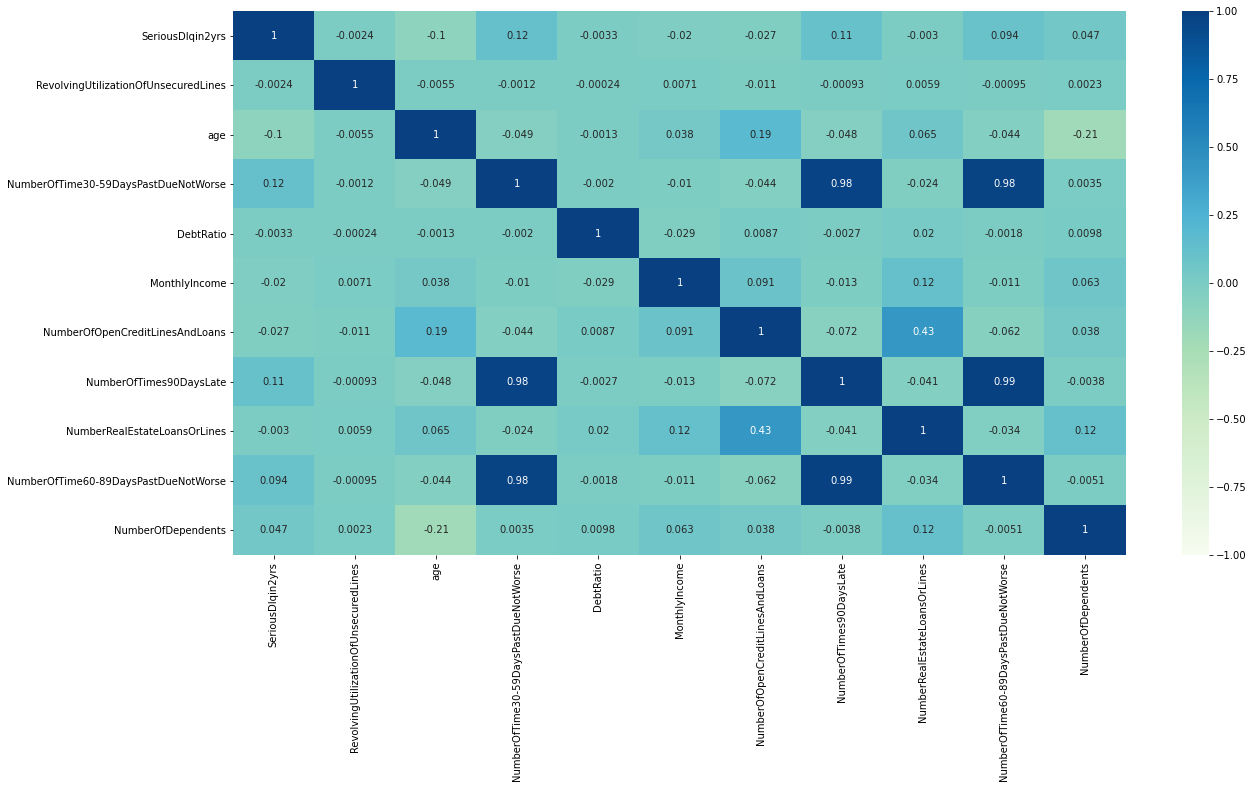

In [17]:
# plot correlation via heatmap
plt.figure(figsize = (20,10))
corr_plot = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()
# corr_plot_fig_path = Path('/Users/aalfiler/Sites/project_2/images/corr_plot.png')
# corr_plot.savefig(corr_plot_fig_path)

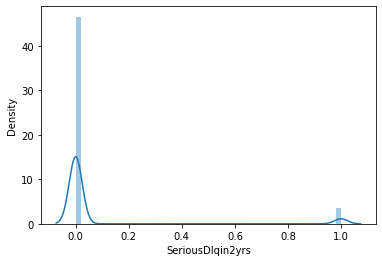

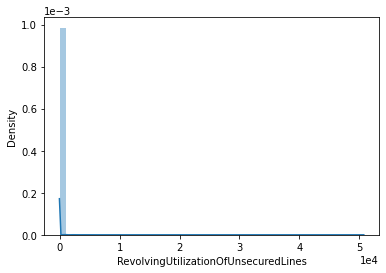

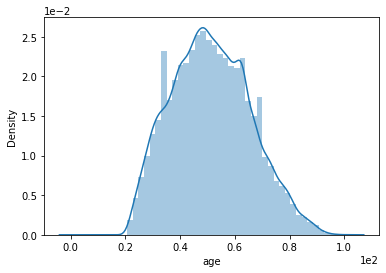

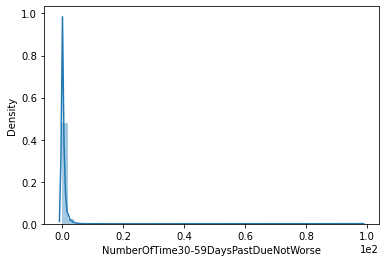

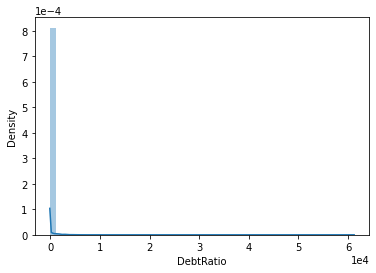

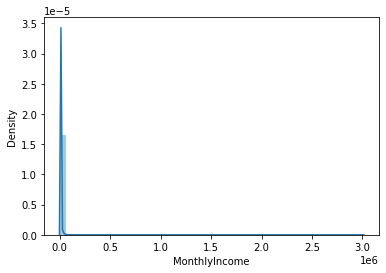

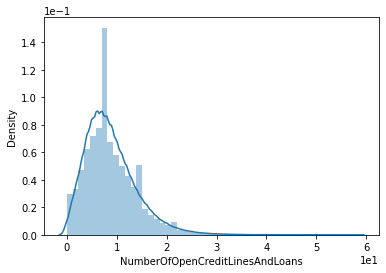

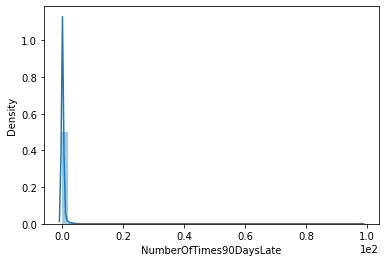

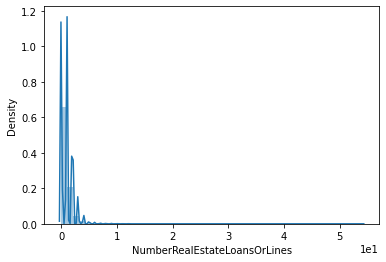

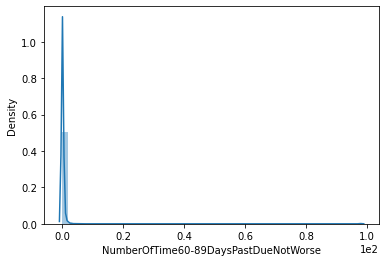

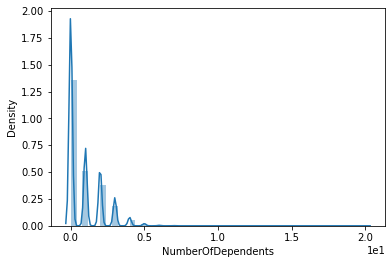

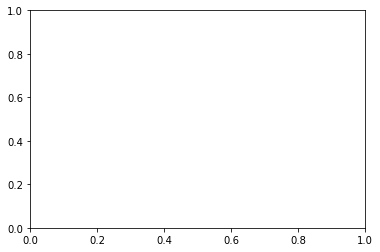

In [41]:
# Plot feature density
def DistPlot(col):
    sns.distplot(col)
    plt.show()
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0)) #need to adjust x limits
DistPlot(train_df['SeriousDlqin2yrs'])
DistPlot(train_df['RevolvingUtilizationOfUnsecuredLines'])
DistPlot(train_df['age'])
DistPlot(train_df['NumberOfTime30-59DaysPastDueNotWorse'])
DistPlot(train_df['DebtRatio'])
DistPlot(train_df['MonthlyIncome'])
DistPlot(train_df['NumberOfOpenCreditLinesAndLoans'])
DistPlot(train_df['NumberOfTimes90DaysLate'])
DistPlot(train_df['NumberRealEstateLoansOrLines'])
DistPlot(train_df['NumberOfTime60-89DaysPastDueNotWorse'])
DistPlot(train_df['NumberOfDependents'])

# Determine Feature Importance

In [22]:
# Define features set
X = train_df.drop(columns="SeriousDlqin2yrs")
y = train_df["SeriousDlqin2yrs"]

In [23]:
# Check the balance of our target values
y.value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

In [24]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [27]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Train data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

train_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
train_rf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [32]:
importances = train_rf.feature_importances_
sorted(zip(train_rf.feature_importances_, X.columns), reverse=True)

[(0.24788222967259038, 'RevolvingUtilizationOfUnsecuredLines'),
 (0.13808215669967316, 'DebtRatio'),
 (0.12738759440454672, 'MonthlyIncome'),
 (0.11343315820396949, 'age'),
 (0.08736602069341838, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (0.08547989471971508, 'NumberOfTimes90DaysLate'),
 (0.08258730958303186, 'NumberOfOpenCreditLinesAndLoans'),
 (0.04545333257531799, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (0.03730882437415353, 'NumberOfDependents'),
 (0.035019479073583354, 'NumberRealEstateLoansOrLines')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

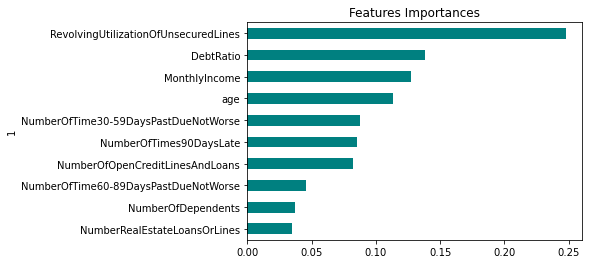

In [39]:
importances_df = pd.DataFrame(sorted(zip(train_rf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='teal', title= 'Features Importances', legend=False)